## Data Analysis: Predicting Level of Education Based on Income and Age.

### Introduction:

It is very difficult to determine what factors contribute to the future income of certain individuals. One may suggest that the level of education may play a significant role. According to (Callendar et al., 2020), higher levels of education and the resulting degrees become more competitive to obtain as there are higher expectations for grades, more financial stress from tuition and “reduced government funding”. Thus the value of an individual’s degree is higher than someone without as they have invested and dedicated sufficient time and money to acquire the degree. However, there is variation in the difficulty in obtaining a degree due to the vast global distribution of schools and as well as the variation in educational performance amongst different locations. The educational performance may vary because of how well funded they are through government choice to provide the funds (Callendar et al., 2020). 

From a global perspective, the relative difficulty to get into certain schools and obtain specific degrees can vary because of different schools. A study from (McArthur & Reeves, 2022) found that schools have “unintended consequences” of being ranked geographically. This is mainly due to socioeconomic segregation within different communities as well as countries such that if the quality of services provided by the school is high, the more likely it is for people to want to attend and how “willing they are to pay more” (McArthur & Reeves, 2022) and those that have a better initial financial background will have better means to attend compared to those who cannot afford it. 

In our project, we used classification methods to predict the education level of a person based on their income. The dataset we chose to use is from a marketing campaign which contains customers from a single company. This data set was chosen as it is a good reflection of a large, randomly sampled group of individuals over a broad geographical area, thus allowing us to be more confident in our prediction analysis via the power of the prediction model. We are assuming that for each individual with the same degree, its value is the same regardless of where they went to school or the time period in which they attended. Our main project questions are: Can we predict a person’s educational background based on their magnitude of income? Is a higher magnitude of income associated with a higher classification of education?


### Methods and Results:


**Reading the File**:

For this analysis, we will need the repr library, the tidyverse library, and the tidymodels library. To start, we will download the data as a .csv file and use read_delim() to read in  the data. Because we will be predicting education level, we will use the mutate() function to change the Education column from a character to a factor. 


In [1]:
library(repr)
library(tidyverse)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

In [4]:
marketing_data <- read_delim("/home/jovyan/toy_ds_project/marketing_campaign.csv") |>
    mutate(Education = as_factor(Education))
head(marketing_data) 
tail(marketing_data)

Rows: 2240 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: "\t"
chr  (3): Education, Marital_Status, Dt_Customer
dbl (26): ID, Year_Birth, Income, Kidhome, Teenhome, Recency, MntWines, MntF...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,⋯,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
<dbl>,<dbl>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5524,1957,Graduation,Single,58138,0,0,04-09-2012,58,635,⋯,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344,1,1,08-03-2014,38,11,⋯,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613,0,0,21-08-2013,26,426,⋯,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646,1,0,10-02-2014,26,11,⋯,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293,1,0,19-01-2014,94,173,⋯,5,0,0,0,0,0,0,3,11,0
7446,1967,Master,Together,62513,0,1,09-09-2013,16,520,⋯,6,0,0,0,0,0,0,3,11,0


ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,⋯,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
<dbl>,<dbl>,<fct>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8372,1974,Graduation,Married,34421,1,0,01-07-2013,81,3,⋯,7,0,0,0,0,0,0,3,11,0
10870,1967,Graduation,Married,61223,0,1,13-06-2013,46,709,⋯,5,0,0,0,0,0,0,3,11,0
4001,1946,PhD,Together,64014,2,1,10-06-2014,56,406,⋯,7,0,0,0,1,0,0,3,11,0
7270,1981,Graduation,Divorced,56981,0,0,25-01-2014,91,908,⋯,6,0,1,0,0,0,0,3,11,0
8235,1956,Master,Together,69245,0,1,24-01-2014,8,428,⋯,3,0,0,0,0,0,0,3,11,0
9405,1954,PhD,Married,52869,1,1,15-10-2012,40,84,⋯,7,0,0,0,0,0,0,3,11,1


**Figure 1**: The head and tail of the original dataframe with education as a factor.

**Observing the Data:**

We will then summarize the original dataframe to see the proportions of our categories. This will be helpful in building our classification model, because we will know if we need to make any adjustments to the data during the wrangling process.

In [33]:
marketing_counts <- marketing_data |> 
    group_by(Education) |>
    summarize(Count = n())
marketing_counts

Education,Count
<fct>,<int>
Graduation,1127
PhD,486
Master,370
Basic,54
2n Cycle,203


**Figure 2:** A dataframe showing the number of people from each education type.

**Tidying and Wrangling the Data:**

We will then tidy the data by selecting the Year_Birth, Education and Income columns, as those are the columns we will be using as our predictors and prediction. For this report, we will also focus specifically on two levels of education: Basic and Graduation. We chose to focus on these two categories specifically since we are primarily interested in the difference between a high school level of education and a college level of education. To focus on these two categories specifically, we will create two new data frames: marketing_basic_ed, and marketing_grad_ed. By using the filter() function, we can make marketing_basic_ed hold data for those with a Basic level of education, and marketing_grad_ed hold data for those with a Graduation level of education.

Since **Figure 2** tells us that there is roughly a 20 to 1 ratio of Graduation to Basic levels of education, we will need to take a small sample of the Graduation observations for our marketing_grad_ed dataframe so that there is an equal number of observations from each category. Since the data is already in a randomized order, we can do this using the head() function and taking the first 54 observations of those with a Graduation level of education. 

We can then use rbind() to stack these two dataframes so that we have one primary dataframe with our two categories of interest: Basic and Graduation. Then, we must use the filter() and is.na() function to make sure there are no NA values in our data frame. Lastly, we will use the droplevels() function to make sure the only two levels of education are Basic and Graduation. 

In [5]:
# selects yob, education, and income columns
marketing_data_tidy <- marketing_data |>
    select(Year_Birth, Education, Income) 

# creates dataframe for people with only a basic degree
marketing_basic_ed <- marketing_data_tidy |> 
  filter(Education == "Basic")

# counts number of people with a basic degree
marketing_basic_ed_count <- summarize(marketing_basic_ed, n())
count <- pull(marketing_basic_ed_count, 1)

# creates dataframe for people with a bachelors degree
# (number of rows is equal to number of rows in marketing_basic_ed)
marketing_grad_ed <- marketing_data_tidy |> 
  filter(Education == "Graduation") |>
  head(count)

# rbind() stacks marketing__ed and marketing_grad_ed
marketing_data <- rbind(marketing_basic_ed, marketing_grad_ed)

# filters out all the observations with an NA cell
marketing_data <- marketing_data |>
  filter(!is.na(Year_Birth)) |>
  filter(!is.na(Education)) |>
  filter(!is.na(Income)) 

# drops the "Master", "PhD", and "2n Cycle" categories from Education
marketing_data$Education <- droplevels(marketing_data$Education)

head(marketing_data)
tail(marketing_data)

Year_Birth,Education,Income
<dbl>,<fct>,<dbl>
1976,Basic,7500
1979,Basic,24594
1976,Basic,9548
1961,Basic,28249
1978,Basic,24882
1981,Basic,24480


Year_Birth,Education,Income
<dbl>,<fct>,<dbl>
1957,Graduation,50388
1973,Graduation,79593
1967,Graduation,54178
1983,Graduation,30096
1960,Graduation,47916
1972,Graduation,51813


**Figure 3**: The head and tail of the dataframe of the tidy data.

**Summarizing The Data:**

The next step in our data analysis is to split our tidy data into a training set and testing set. Since this needs to be randomized, we will set a seed before we do this. Then, we will split the data into training and test sets, using 75% of the data in our training set and the other 25% in our test set. 

Using the training set, we will create a summary table with columns Education and Mean_Income. This will show the mean income for each category of education. 

In [7]:
# sets seed
set.seed(1)

# splits data into training and test set
marketing_data_split <- initial_split(marketing_data, prop = 0.75, strata = Education)
marketing_data_train <- training(marketing_data_split)
marketing_data_test <- testing(marketing_data_split) 

# summarizes training data
marketing_data_summarized <- marketing_data_train |>
    group_by(Education) |>
    summarize(Mean_Income = mean(Income, na.rm = TRUE))
marketing_data_summarized

Education,Mean_Income
<fct>,<dbl>
Graduation,50162.53
Basic,20534.25


**Figure 4**: A dataframe summarizing the two categories of education and the average income of each category. Observe that the mean income is roughly $30 000 higher for those with a graduation level of education than for those with a basic level of education.

**Visualizing the Data:**

We will then visualize the training data using a scatter plot with year of birth plotted along the x-axis and Income along the y-axis. Additionally, we will colour the plots by education. 

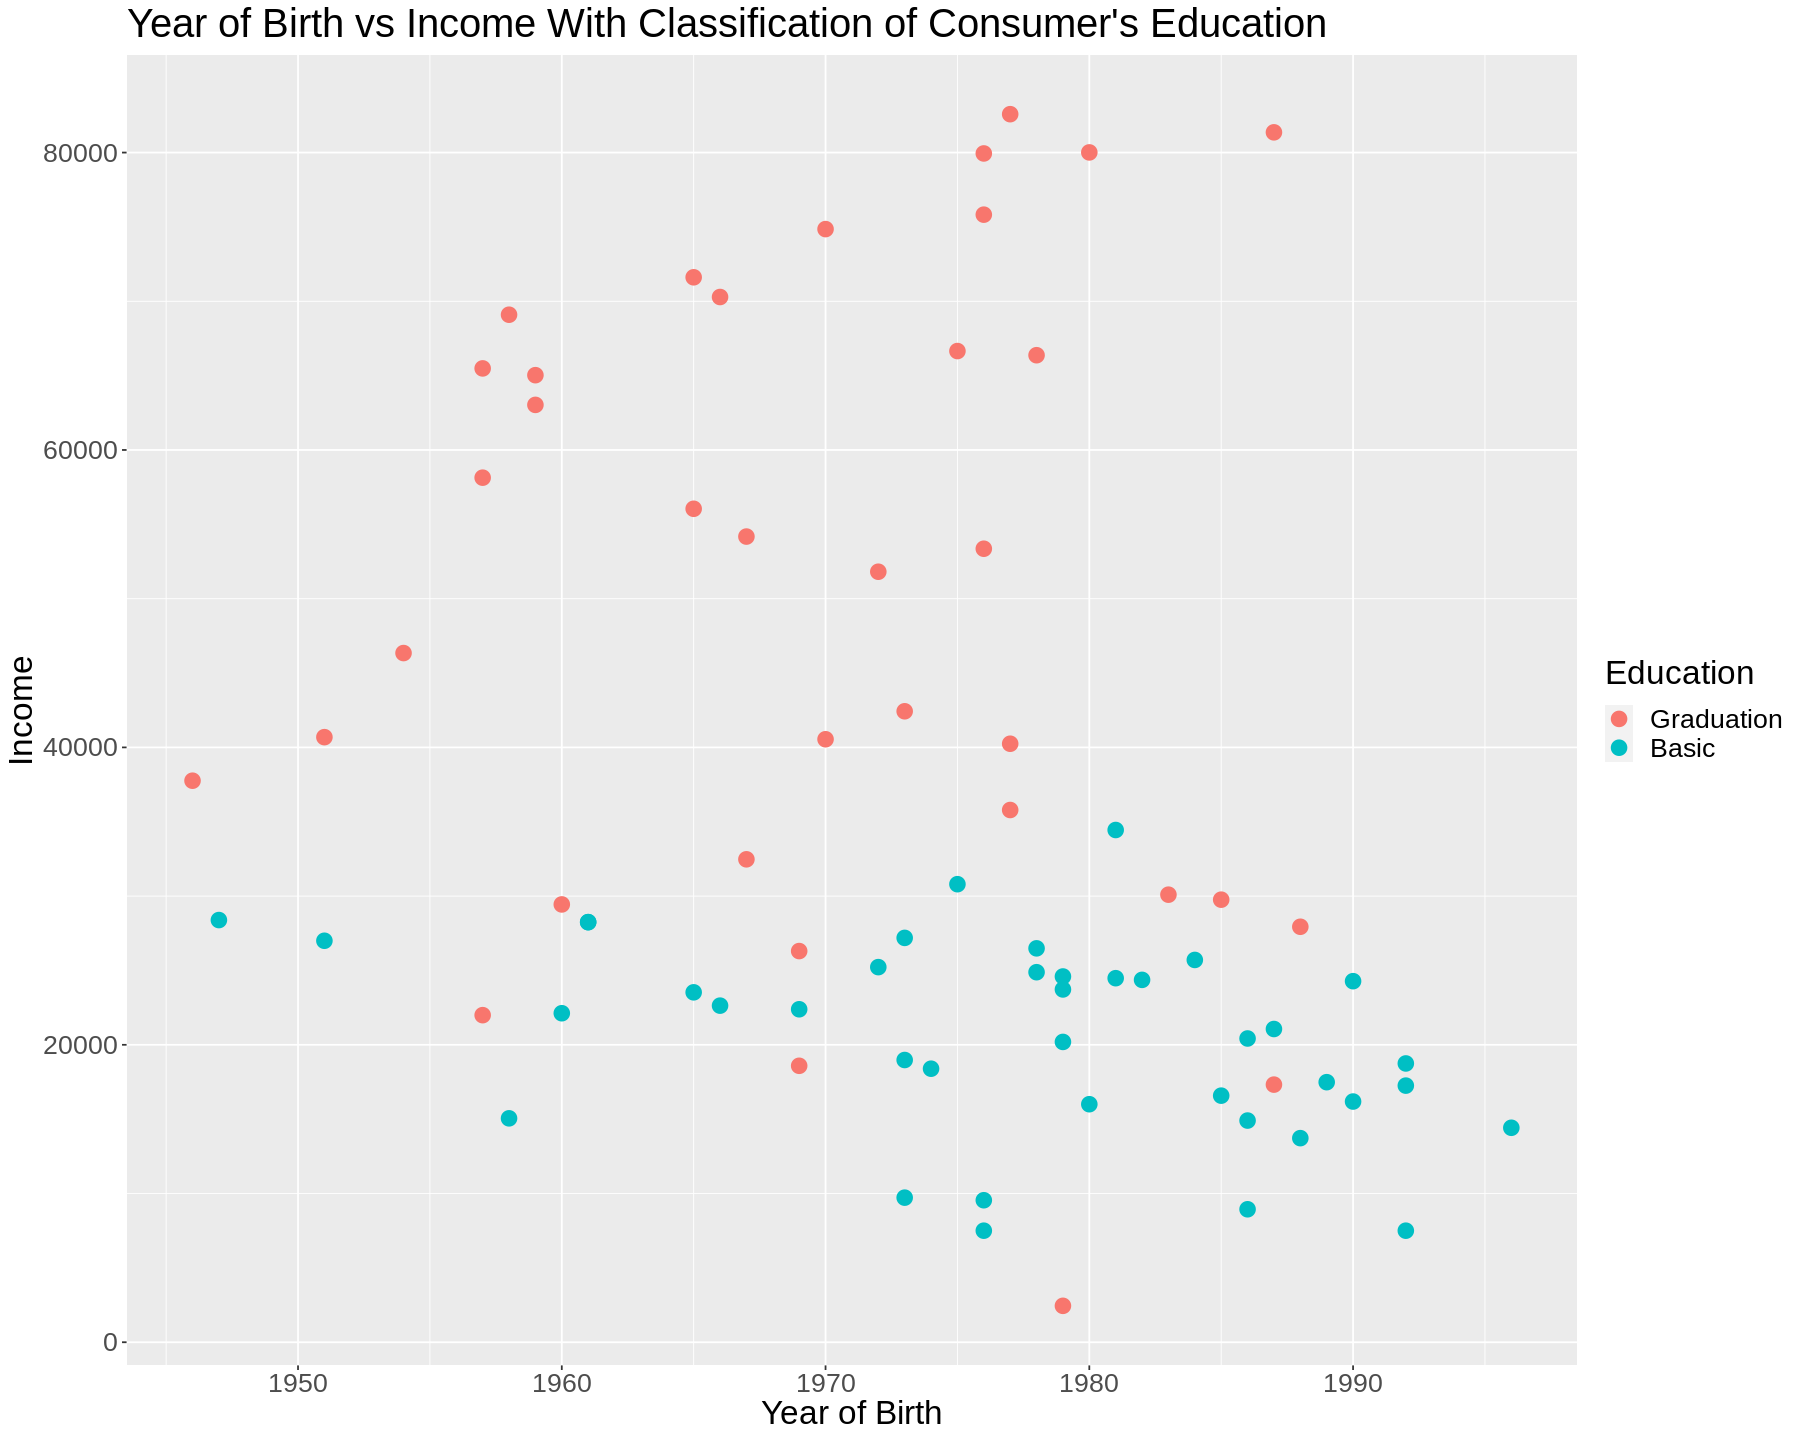

In [8]:
# visualizes training data using scatterplot

options(repr.plot.width = 15, repr.plot.height = 12)

marketing_plot <- marketing_data_train |> ggplot(aes(x = Year_Birth, y = Income, color = Education)) +
    geom_point(size = 4) +
    labs(x = "Year of Birth", y = "Income") +
    ggtitle("Year of Birth vs Income With Classification of Consumer's Education") +
    theme(text = element_text(size = 20))
marketing_plot

**Figure 5**: A scatterplot of the data showing Year of Birth vs Income with the points coloured based on the person's category of education.

**Performing 5-Fold Cross Validation and Plotting a Neighbors vs. Average Accuracy Plot:**

Now, we will begin building our classification model. Since we are performing cross-validation, we will again set a seed to make sure we get the same randomization each time we run the code. Then, we will use the vfold_cv() function to specify the number of folds we want to have when we perform cross-validation. Since we are not using a large amount of data, we will choose to use 5-fold cross validation. Next, we will specify our classification model using the nearest_neighbor(), set_engine(), and set_mode() function. Note that we are setting the neighbors to tune(), since we want neighbors to be a variable when performing cross validation. Then, we will create our recipe for classification using the recipe() function, where we specify Education as our prediction and Income and Year_Birth as our predictors. We will also use the step_scale() and step_centre() functions to make sure our data is scaled and centred when making classifications based on K neighbors.

Next, we must create a tibble of K values so that we can compare the accuracies of a range of different numbers of neighbors. We will then use the workflow() function to combine the cross validation model, the classification model, the recipe, and the tibble of K values to compute our accuracies for each K value. To see our result, we will plot the data on a graph, with the number of neighbors on the X-axis and the average accuracy on the Y-axis.

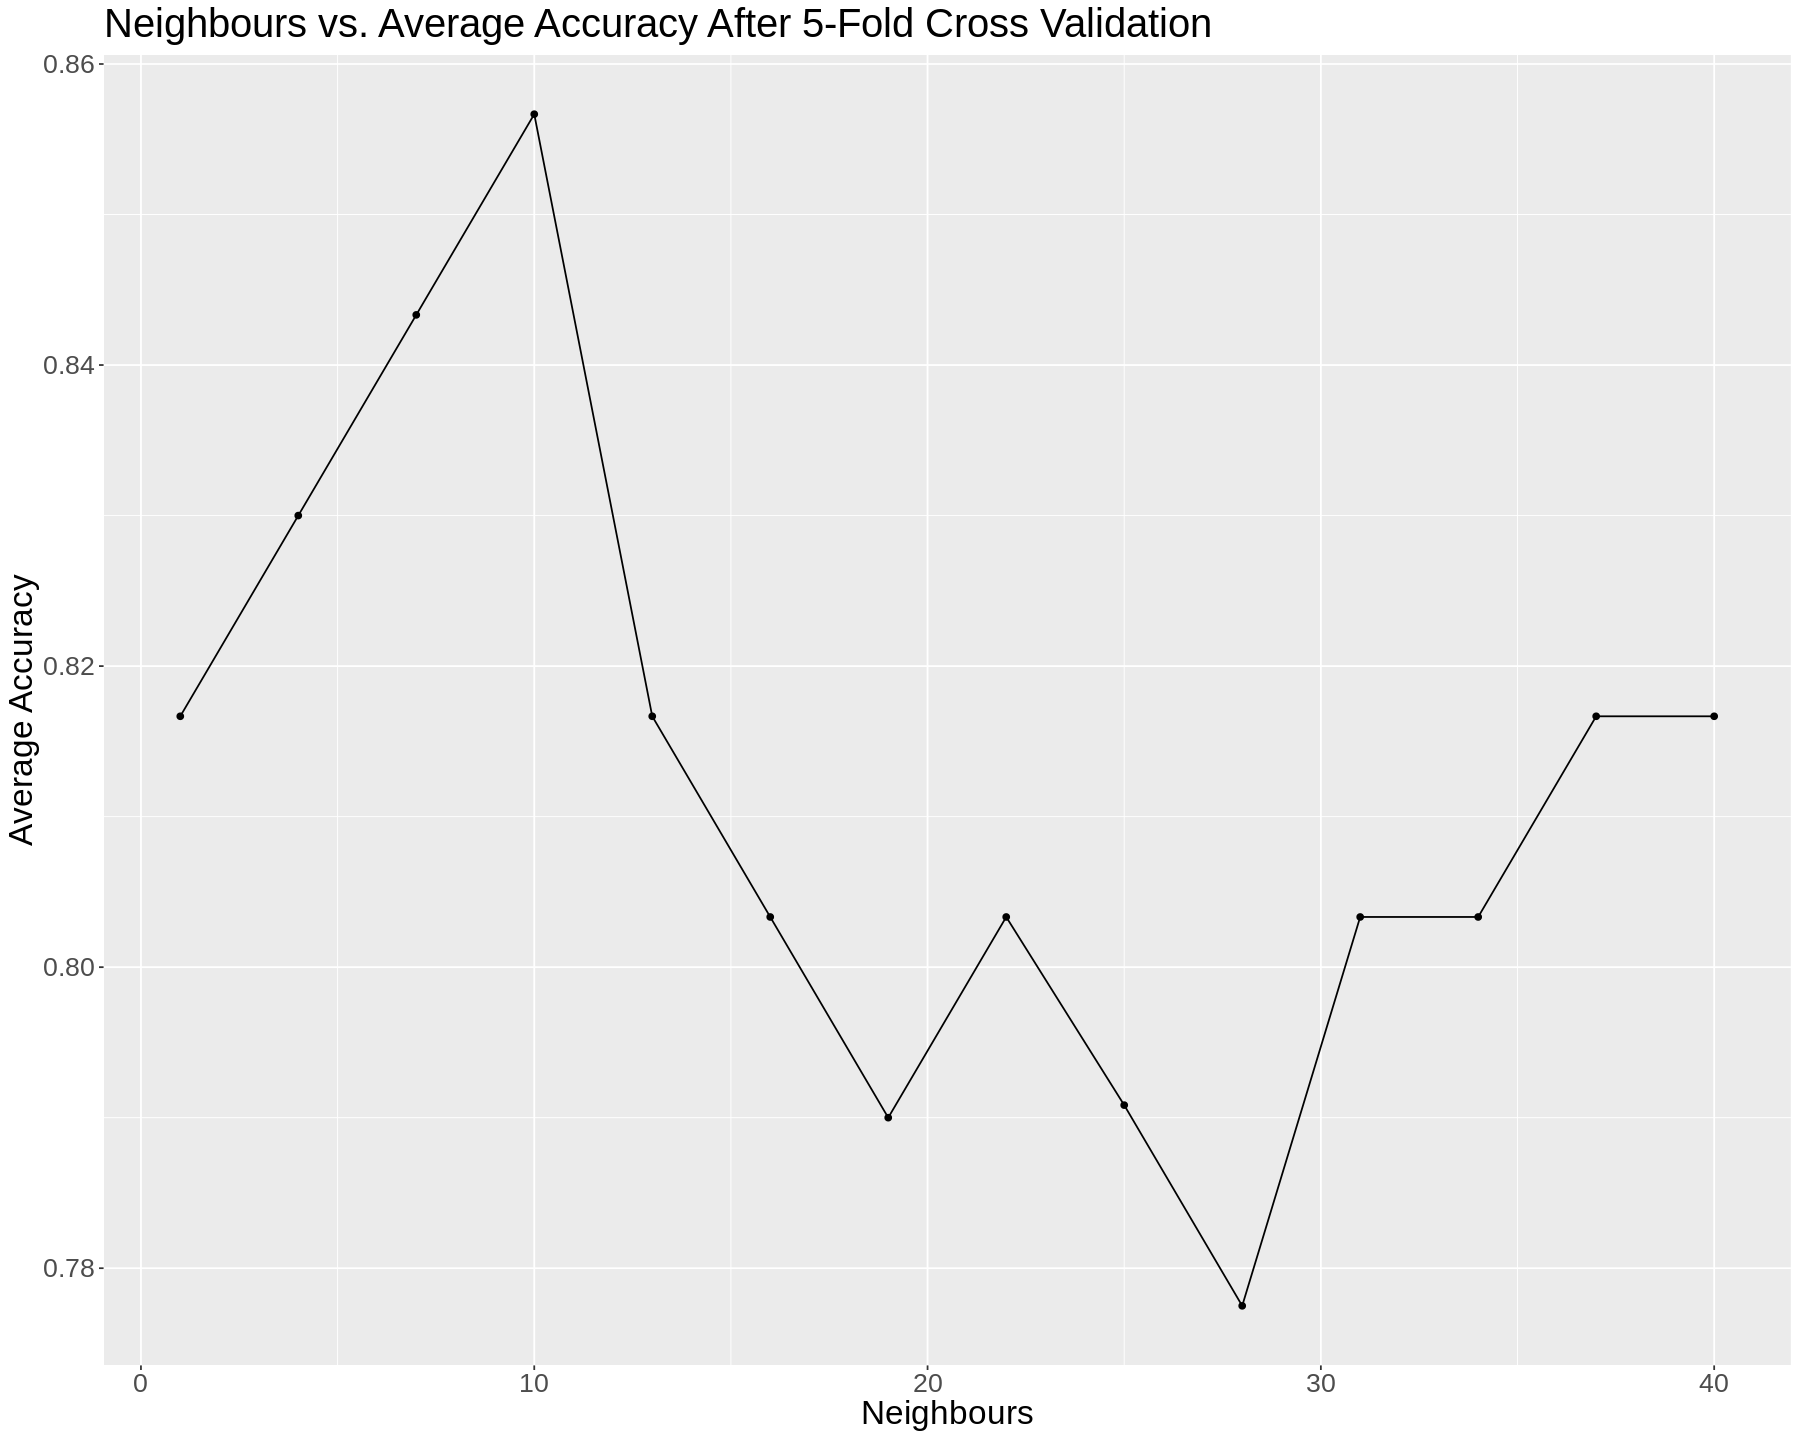

In [9]:
# sets the seed
set.seed(1)

# specify number of folds
marketing_vfold <- vfold_cv(data = marketing_data_train, v = 5, strata = Education)

# specify model
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

# build recipe
marketing_recipe <- recipe(Education ~ Income + Year_Birth, data = marketing_data_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

# create a column of K values
k_vals <- tibble(neighbors = seq(from = 1, to = 40, by = 3))

# compute the accuracies of each K value
accuracies <- workflow() |>
  add_recipe(marketing_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = marketing_vfold, grid = k_vals) |>
  collect_metrics() |>
  filter(.metric == "accuracy")

# observe neighbors vs accuracy plot
accuracies_plot <- accuracies |>
  ggplot(aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbours", y = "Average Accuracy") +
  ggtitle("Neighbours vs. Average Accuracy After 5-Fold Cross Validation") +
  theme(text = element_text(size = 20))
accuracies_plot

**Figure 6:** A plot showing the average accuracy of the classifier depending on how many neighbors are used in the knn-classification model.

**Choosing the Best K:**

Next, we will choose our best K value by filtering to the observation with the maximum accuracy and pulling the number of neighbors. We will store this number in the variable: best_k.

In [10]:
# pulls the best k
best_k <- accuracies |> 
  filter(mean == max(mean)) |>
  pull(neighbors)
best_k

[1] 10

**Fitting a New Model With The Best K:**

Now that we have our best K value, we will use it to build our final classification model. Again, we will use the nearest_neighbor() function, but this time setting neighbors to best_k. Again, we will set the engine to "kknn" and the mode to "classification". Next, we will fit this model using the workflow() function, so we can use our classifier to make predictions.

In [11]:
# specify new model with best K value
knn_best_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |>
  set_engine("kknn") |>
  set_mode("classification")


# fit knn model with best specs
marketing_fit <- workflow() |>
  add_recipe(marketing_recipe) |>
  add_model(knn_best_spec) |>
  fit(data = marketing_data_train)

**Summarizing Our Predictions:**

Next, we will make our predictions. We can do this by using the predict() function with our fitted classification model and our testing data as arguments. We can then use bind_cols() to place our testing data and our predictions side by side. This will show us a comparison between the predicted education levels and the actual education levels. 



In [12]:
# get predictions on test data
predictions <- predict(marketing_fit, marketing_data_test) |>
  bind_cols(marketing_data_test)
predictions


.pred_class,Year_Birth,Education,Income
<fct>,<dbl>,<fct>,<dbl>
Basic,1979,Basic,24594
Basic,1978,Basic,24882
Basic,1980,Basic,25965
Basic,1952,Basic,13084
Basic,1991,Basic,26868
Basic,1989,Basic,25443
Basic,1987,Basic,15038
Basic,1966,Basic,22634
Basic,1979,Basic,15862


**Figure 7:** A dataframe of predictions vs. actual education levels from the testing data.

**Evaluating the Accuracy of Our Model:**

Lastly, to evaluate the accuracy of our model, we will use the metrics() function on our dataframe of predictions. This will compute the percentage of predictions that are correct, telling us how well our classification model works and how consistent the difference between Graduation and Basic levels of education is.



In [13]:
# evaluate accuracy of classifier using test data
accuracy <- predictions |>
  metrics(truth = Education, estimate = .pred_class) |>
  filter(.metric == "accuracy") |>
  pull(.estimate)
accuracy

[1] 0.8148148

### Discussion:

(insert from doc)
